# Lung Cancer Prediction

<span style="font-family:Calibri">In this machine learning project, I collected the dataset from Kaggle  (https://www.kaggle.com/datasets/shreyasparaj1/lung-cancer-dataset) 
 and I will use machine learning to predict whether a person has lung cancer.</span>

 <span style="font-family:Calibri">The Lung Cancer Risk Factors Dataset is a comprehensive collection of attributes related to individuals, aiming to explore potential factors associated with the occurrence of lung cancer. The dataset encompasses demographic information, lifestyle choices, and health indicators, providing a valuable resource for researchers and data scientists interested in understanding and predicting lung cancer risks.</span>


<span style="font-family:Calibri">

Attributes:

<span style="color:orange">*GENDER</span> : Indicates the gender of the individual (M for Male, F for Female).</br>
<span style="color:orange">AGE</span> : Represents the age of the individual, contributing to the analysis of age-related patterns.</br>
<span style="color:orange">SMOKING</span> : Reflects the smoking habits of individuals, categorized to capture various levels of smoking intensity.</br>
<span style="color:orange">YELLOW_FINGERS</span> : Describes the presence of yellow fingers, potentially associated with lifestyle choices or health conditions.</br>
<span style="color:orange">ANXIETY</span> : Measures the anxiety level of individuals, offering insights into the psychological aspects of health.</br>
<span style="color:orange">PEER_PRESSURE</span> : Indicates the influence of peer pressure on lifestyle choices.</br>
<span style="color:orange">CHRONIC DISEASE</span>: Highlights the presence or absence of chronic diseases, a crucial health factor.</br>
<span style="color:orange">FATIGUE</span> : Reflects the level of fatigue experienced by individuals, providing information on overall health.</br>
<span style="color:orange">ALLERGY</span> : Indicates the presence or absence of allergies, potentially relevant to respiratory health.</br>
<span style="color:orange">WHEEZING</span> : Describes whether wheezing is present, a symptom often associated with respiratory issues.</br>
<span style="color:orange">ALCOHOL CONSUMING</span> : Indicates the alcohol consumption habits of individuals, which can impact overall health.</br>
<span style="color:orange">COUGHING</span> : Represents the occurrence and severity of coughing, a respiratory symptom.</br>
<span style="color:orange">SHORTNESS OF BREATH</span> : Indicates the presence or absence of shortness of breath, another respiratory indicator.</br>
<span style="color:orange">SWALLOWING DIFFICULTY</span> : Describes difficulties in swallowing, potentially linked to respiratory or other health concerns.</br>
<span style="color:orange">CHEST PAIN</span> : Indicates the presence or absence of chest pain, a symptom associated with various health conditions.</br>
<span style="color:orange">LUNG_CANCER</span>: The target variable, specifying whether the individual has been diagnosed with lung cancer (YES or NO).*</br>

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tkinter as tk
from tkinter import messagebox

In [144]:
# Load the dataset
data = pd.read_csv('lung_cancer_dataset.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [146]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<span style="font-family:Calibri">Categorical variable 'GENDER' is converted into numerical format using one-hot encoding. This is achieved by creating binary columns for each unique category in 'GENDER' and assigning binary values (0 or 1) to indicate the presence or absence of each category.</span>

In [147]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['GENDER'])

<span style="font-family:Calibri">The dataset is then divided into features (X) and the target variable (y). The target variable is 'LUNG_CANCER', and 'GENDER' has been excluded from the features.</span>

In [148]:
# Split features and target variable
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

<span style="font-family:Calibri">The dataset is further split into training and testing sets using the train_test_split function from scikit-learn. 80% of the data is used for training the model, and 20% is reserved for testing.</span>

In [149]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<span style="font-family:Calibri">Random Forest Classifier model is instantiated with 100 decision trees (n_estimators=100) and a fixed random state for reproducibility (random_state=42).The model is then trained on the training dataset.</span>

In [150]:
# Train the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<span style="font-family:Calibri">Model is used to predict the target variable (LUNG_CANCER) for the test dataset. The accuracy of the model's predictions is computed by comparing the predicted values (y_pred) with the actual values (y_test) using the accuracy_score function from scikit-learn. The calculated accuracy is then printed to the console.</span>

In [151]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Classifier Accuracy:', accuracy)

Random Forest Classifier Accuracy: 0.967741935483871


<span style="font-family:Calibri">The code utilizes scikit-learn's Gradient Boosting Classifier with 100 boosting stages (n_estimators=100) and a fixed random state (random_state=42). The model is trained on the dataset, predicts the target variable (LUNG_CANCER) for the test set, and calculates accuracy using accuracy_score, displaying the result on the console.</span>

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the GradientBoostingClassifier model
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print('Gradient Boosting Classifier Accuracy:', accuracy_gb)


Gradient Boosting Classifier Accuracy: 0.9516129032258065


In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the DecisionTreeClassifier model
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Classifier Accuracy:', accuracy_dt)


Decision Tree Classifier Accuracy: 0.967741935483871


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with increased max_iter
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Evaluate the Logistic Regression model
y_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression Accuracy:', accuracy_lr)


Logistic Regression Accuracy: 0.967741935483871


In [155]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate the SVM model
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', accuracy_svm)


SVM Accuracy: 0.967741935483871


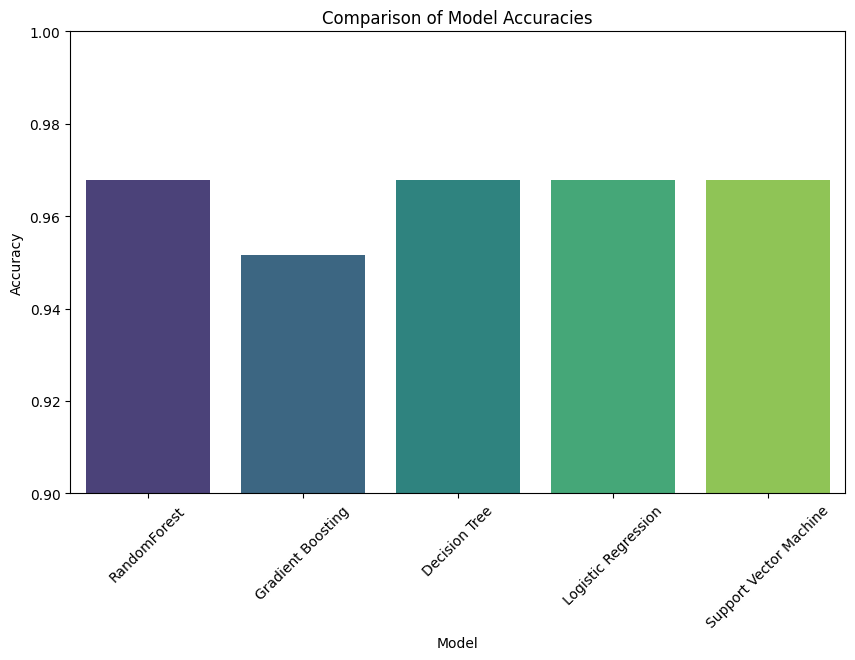

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define accuracies of all four models
accuracies = {
    'RandomForest': accuracy,
    'Gradient Boosting': accuracy_gb,
    'Decision Tree': accuracy_dt,
    'Logistic Regression': accuracy_lr,
    'Support Vector Machine': accuracy_svm
}

# Create a DataFrame from the accuracies dictionary
accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracies_df, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Optional: set the y-axis limits for better visualization
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.show()


<span style="font-family:Calibri">This code snippet utilizes Seaborn to visualize and compare the accuracies of five machine learning models <span style="color:orange">(RandomForest, Gradient Boosting, Decision Tree, Logistic Regression, and Support Vector Machine)</span> through a bar graph. All models, except Gradient Boosting, achieved a <span style="color:red">high accuracy of 96%;</span> thus, the RandomForest model is chosen for further training.</span>

<span style="font-family:Calibri">This function is likely intended to be linked to a button in a tkinter-based GUI, allowing users to input their information and receive a prediction for the presence of lung cancer. The final result is displayed on the GUI through the result_label. Note that the last element in the input list is set to 0; you might want to review if this is consistent with your model's expectations for input features.</span>

In [130]:
# Create a GUI
def predict():
    # Get input values from the GUI
    gender = int(gender_var.get())
    age = int(age_var.get())
    smoking = int(smoking_var.get())
    yellow_fingers = int(yellow_fingers_var.get())
    anxiety = int(anxiety_var.get())
    peer_pressure = int(peer_pressure_var.get())
    chronic_disease = int(chronic_disease_var.get())
    fatigue = int(fatigue_var.get())
    allergy = int(allergy_var.get())
    wheezing = int(wheezing_var.get())
    alcohol_consuming = int(alcohol_consuming_var.get())
    coughing = int(coughing_var.get())
    shortness_of_breath = int(shortness_of_breath_var.get())
    swallowing_difficulty = int(swallowing_difficulty_var.get())
    chest_pain = int(chest_pain_var.get())

    # Make a prediction
    prediction = model.predict([[gender, age, smoking, yellow_fingers, anxiety, peer_pressure,
                                chronic_disease, fatigue, allergy, wheezing, alcohol_consuming,
                                coughing, shortness_of_breath, swallowing_difficulty, chest_pain, 0]])

    # Display the prediction
    if prediction[0] == 'YES':
        result_label.config(text="Lung Cancer: Yes")
    else:
        result_label.config(text="Lung Cancer: No")

<span style="font-family:Calibri">Users can input values into the fields, click the "Predict" button, and the result will be displayed on the GUI. The predict function takes the input values, uses the pre-trained model to make a prediction, and updates the result_label accordingly.</span>

In [132]:
# Create GUI window
root = tk.Tk()
root.title("Lung Cancer Predictor")

# Create input fields
tk.Label(root, text="Gender (1 for Female, 2 for Male):").grid(row=0, column=0)
gender_var = tk.Entry(root)
gender_var.grid(row=0, column=1)

tk.Label(root, text="Age:").grid(row=1, column=0)
age_var = tk.Entry(root)
age_var.grid(row=1, column=1)

tk.Label(root, text="Yellow Fingers (1 for No, 2 for Yes):").grid(row=3, column=0)
yellow_fingers_var = tk.Entry(root)
yellow_fingers_var.grid(row=3, column=1)

tk.Label(root, text="Anxiety Level (1 for Low, 2 for High):").grid(row=4, column=0)
anxiety_var = tk.Entry(root)
anxiety_var.grid(row=4, column=1)

tk.Label(root, text="Smoking (1 for No, 2 for Yes):").grid(row=2, column=0)
smoking_var = tk.Entry(root)
smoking_var.grid(row=2, column=1)

tk.Label(root, text="Peer Pressure (1 for No, 2 for Yes):").grid(row=5, column=0)
peer_pressure_var = tk.Entry(root)
peer_pressure_var.grid(row=5, column=1)

tk.Label(root, text="Chronic Disease (1 for No, 2 for Yes):").grid(row=6, column=0)
chronic_disease_var = tk.Entry(root)
chronic_disease_var.grid(row=6, column=1)

tk.Label(root, text="Fatigue (1 for No, 2 for Yes):").grid(row=7, column=0)
fatigue_var = tk.Entry(root)
fatigue_var.grid(row=7, column=1)

tk.Label(root, text="Allergy (1 for No, 2 for Yes):").grid(row=8, column=0)
allergy_var = tk.Entry(root)
allergy_var.grid(row=8, column=1)

tk.Label(root, text="Wheezing (1 for No, 2 for Yes):").grid(row=9, column=0)
wheezing_var = tk.Entry(root)
wheezing_var.grid(row=9, column=1)

tk.Label(root, text="Alcohol Consuming (1 for No, 2 for Yes):").grid(row=10, column=0)
alcohol_consuming_var = tk.Entry(root)
alcohol_consuming_var.grid(row=10, column=1)

tk.Label(root, text="Coughing (1 for No, 2 for Yes):").grid(row=11, column=0)
coughing_var = tk.Entry(root)
coughing_var.grid(row=11, column=1)

tk.Label(root, text="Shortness of Breath (1 for No, 2 for Yes):").grid(row=12, column=0)
shortness_of_breath_var = tk.Entry(root)
shortness_of_breath_var.grid(row=12, column=1)

tk.Label(root, text="Swallowing Difficulty (1 for No, 2 for Yes):").grid(row=13, column=0)
swallowing_difficulty_var = tk.Entry(root)
swallowing_difficulty_var.grid(row=13, column=1)

tk.Label(root, text="Chest Pain (1 for No, 2 for Yes):").grid(row=14, column=0)
chest_pain_var = tk.Entry(root)
chest_pain_var.grid(row=14, column=1)

# Create a button to predict
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.grid(row=16, column=1)

# Create a label to display the result
result_label = tk.Label(root, text="")
result_label.grid(row=17, column=0, columnspan=2)

root.mainloop()

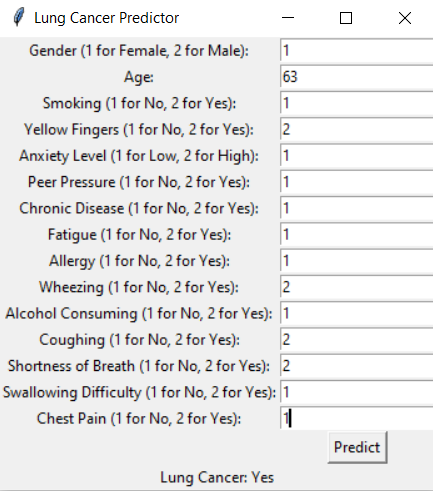

<span style="font-family:Calibri">In conclusion, this project has successfully implemented a lung cancer prediction model through machine learning. The model has been integrated into a user-friendly graphical interface using Tkinter in Python. Users can input information, click "Predict," and receive instant predictions on the likelihood of lung cancer. The project exemplifies the practical application of machine learning for early detection in a user-accessible format.</span>